# 3. Ciência de Dados em Python 
## 3.4. Preparação de Dados

Este notebook é parte do material do Curso de Treinamento em IA criado pelo IFMA/DComp e financiado pelo SOFTEX, 2023.



# Exemplo de Preparação de Dados

Neste exemplo iremos utilizar os dados da House Prices Kaggle Competition. Confira o link abaixo: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Este mesmo dataset iremos utilizar para um exemplo de análise exploratória. Aqui vamos focar nas etapas de limpeza e transformação:
- Tratamento de Dados Ausentes
- Tratamento de valores anômalos (outliers)
- Transformação 
    - Re-escala de dados numérics
    - Transformação de dados categóricos

## 0. Configurações e leitura dos dados

Dependências

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
#from sklearn import ensemble, tree, linear_model
import missingno as msno

Configuração de plot

In [89]:
plt.rcParams["figure.figsize"] = (6,3)

Carregar os dados

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1. Descrição básica  dos dados

O passo inicial é ter uma descrição básica. Use o método `describe()` para ter estatísticas descritivas. Este métodos são robustos, ou seja, não incluem os valores nulos dos dados. 

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Veja também os dados categóricos

In [4]:
train.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Use head(), tail() e sample() para ter uma ideia inicial sobre os dados

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
train.sample(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
237,238,60,RL,NaN,9453,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,194500
412,413,20,FV,NaN,4403,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,222000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
235,236,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,89500
1119,1120,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,133700
470,471,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,212000
819,820,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
1333,1334,50,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,125500
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000


Vale a pena verificar se a quantidade de tuplas e atributos está de acordo com a descrição dada.

In [8]:
train.shape , test.shape

((1460, 81), (1459, 80))

Vamos verificar quais são as colunas numericas no dataset

In [9]:
train_num_df = train.select_dtypes(include=['number'])
train_num_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

O mesmo para colunas categóricas

In [10]:
train_cat_df = train.select_dtypes(include=['object'])
train_cat_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## 2. Dados ausentes

### 2.1 - Diagnóstico de dados ausentes 

Vejamos as colunas com mais dados ausentes

In [11]:
(train.isnull().sum()/len(train)).sort_values(ascending=False)[:10]


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

A biblioteca missingno mostra a mesma informação com a função `.bar()`

<AxesSubplot: >

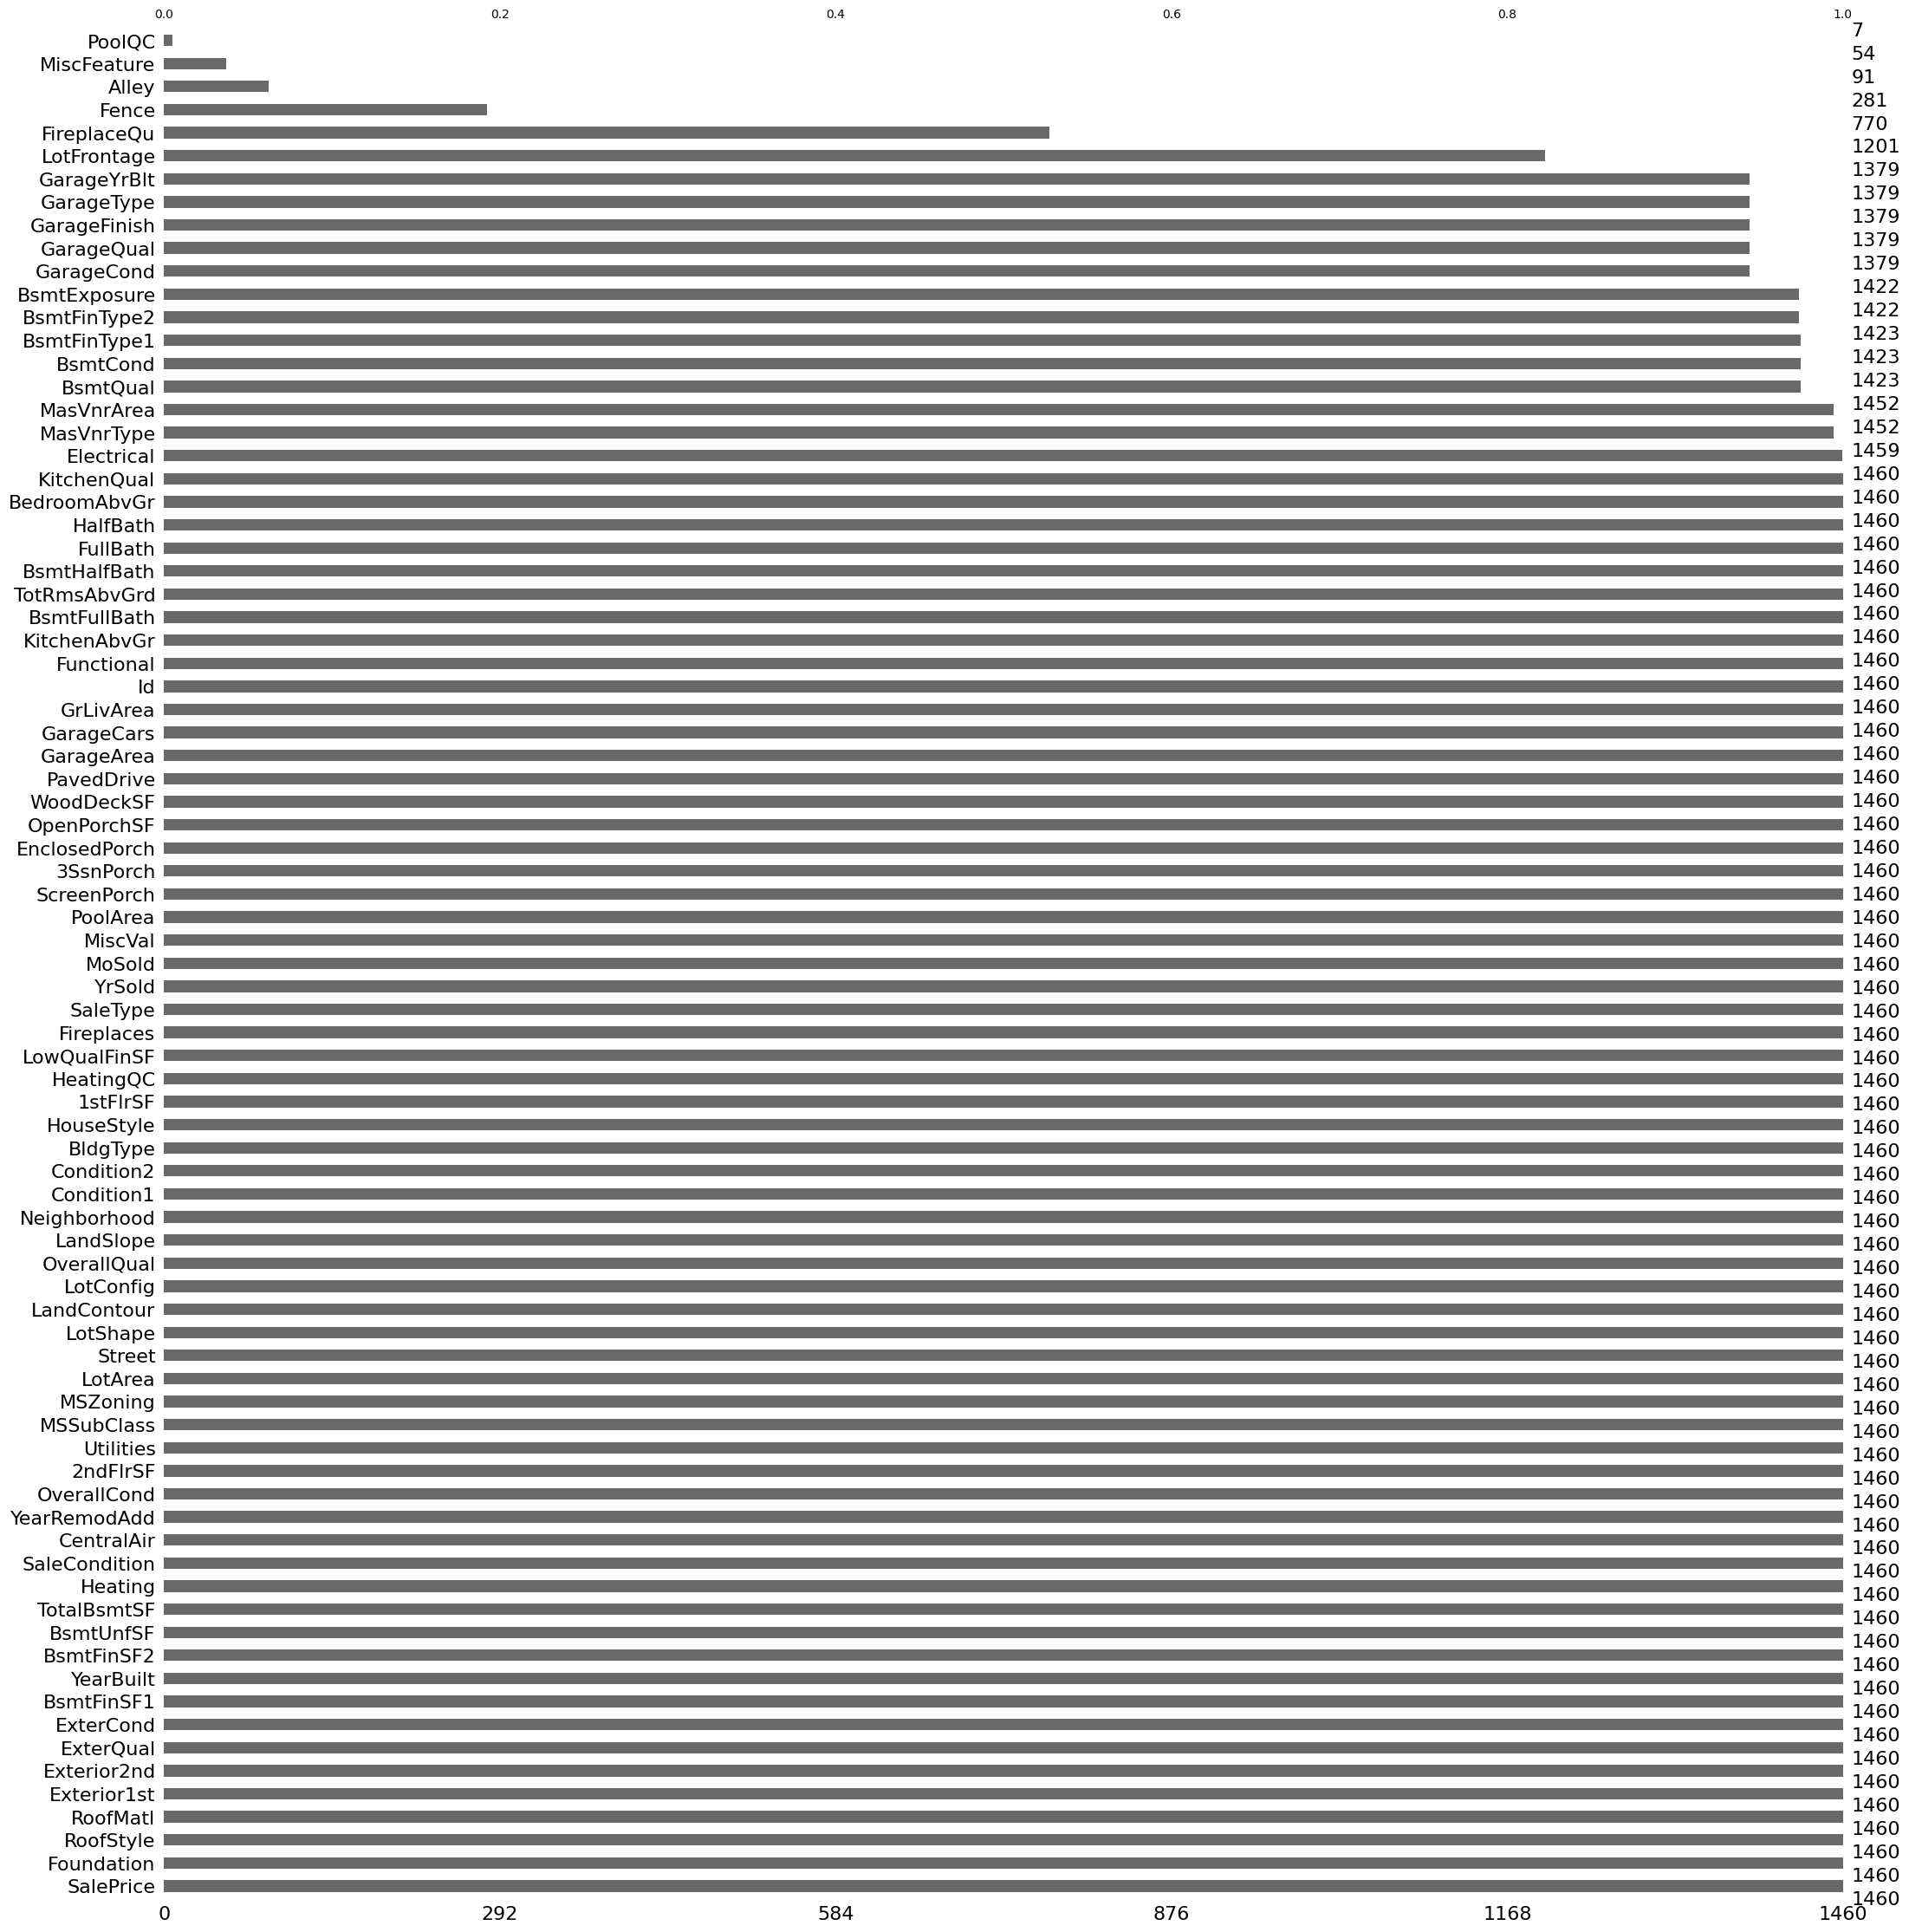

In [82]:
msno.bar(train, sort='descending')

O dendrogram agrupa atributos com taxa de ausencia de dados similares. Os atributos que aparecem juntos em uma ramificação, tendem a estarem presentes ou ausente de modo conjunto.

<AxesSubplot: >

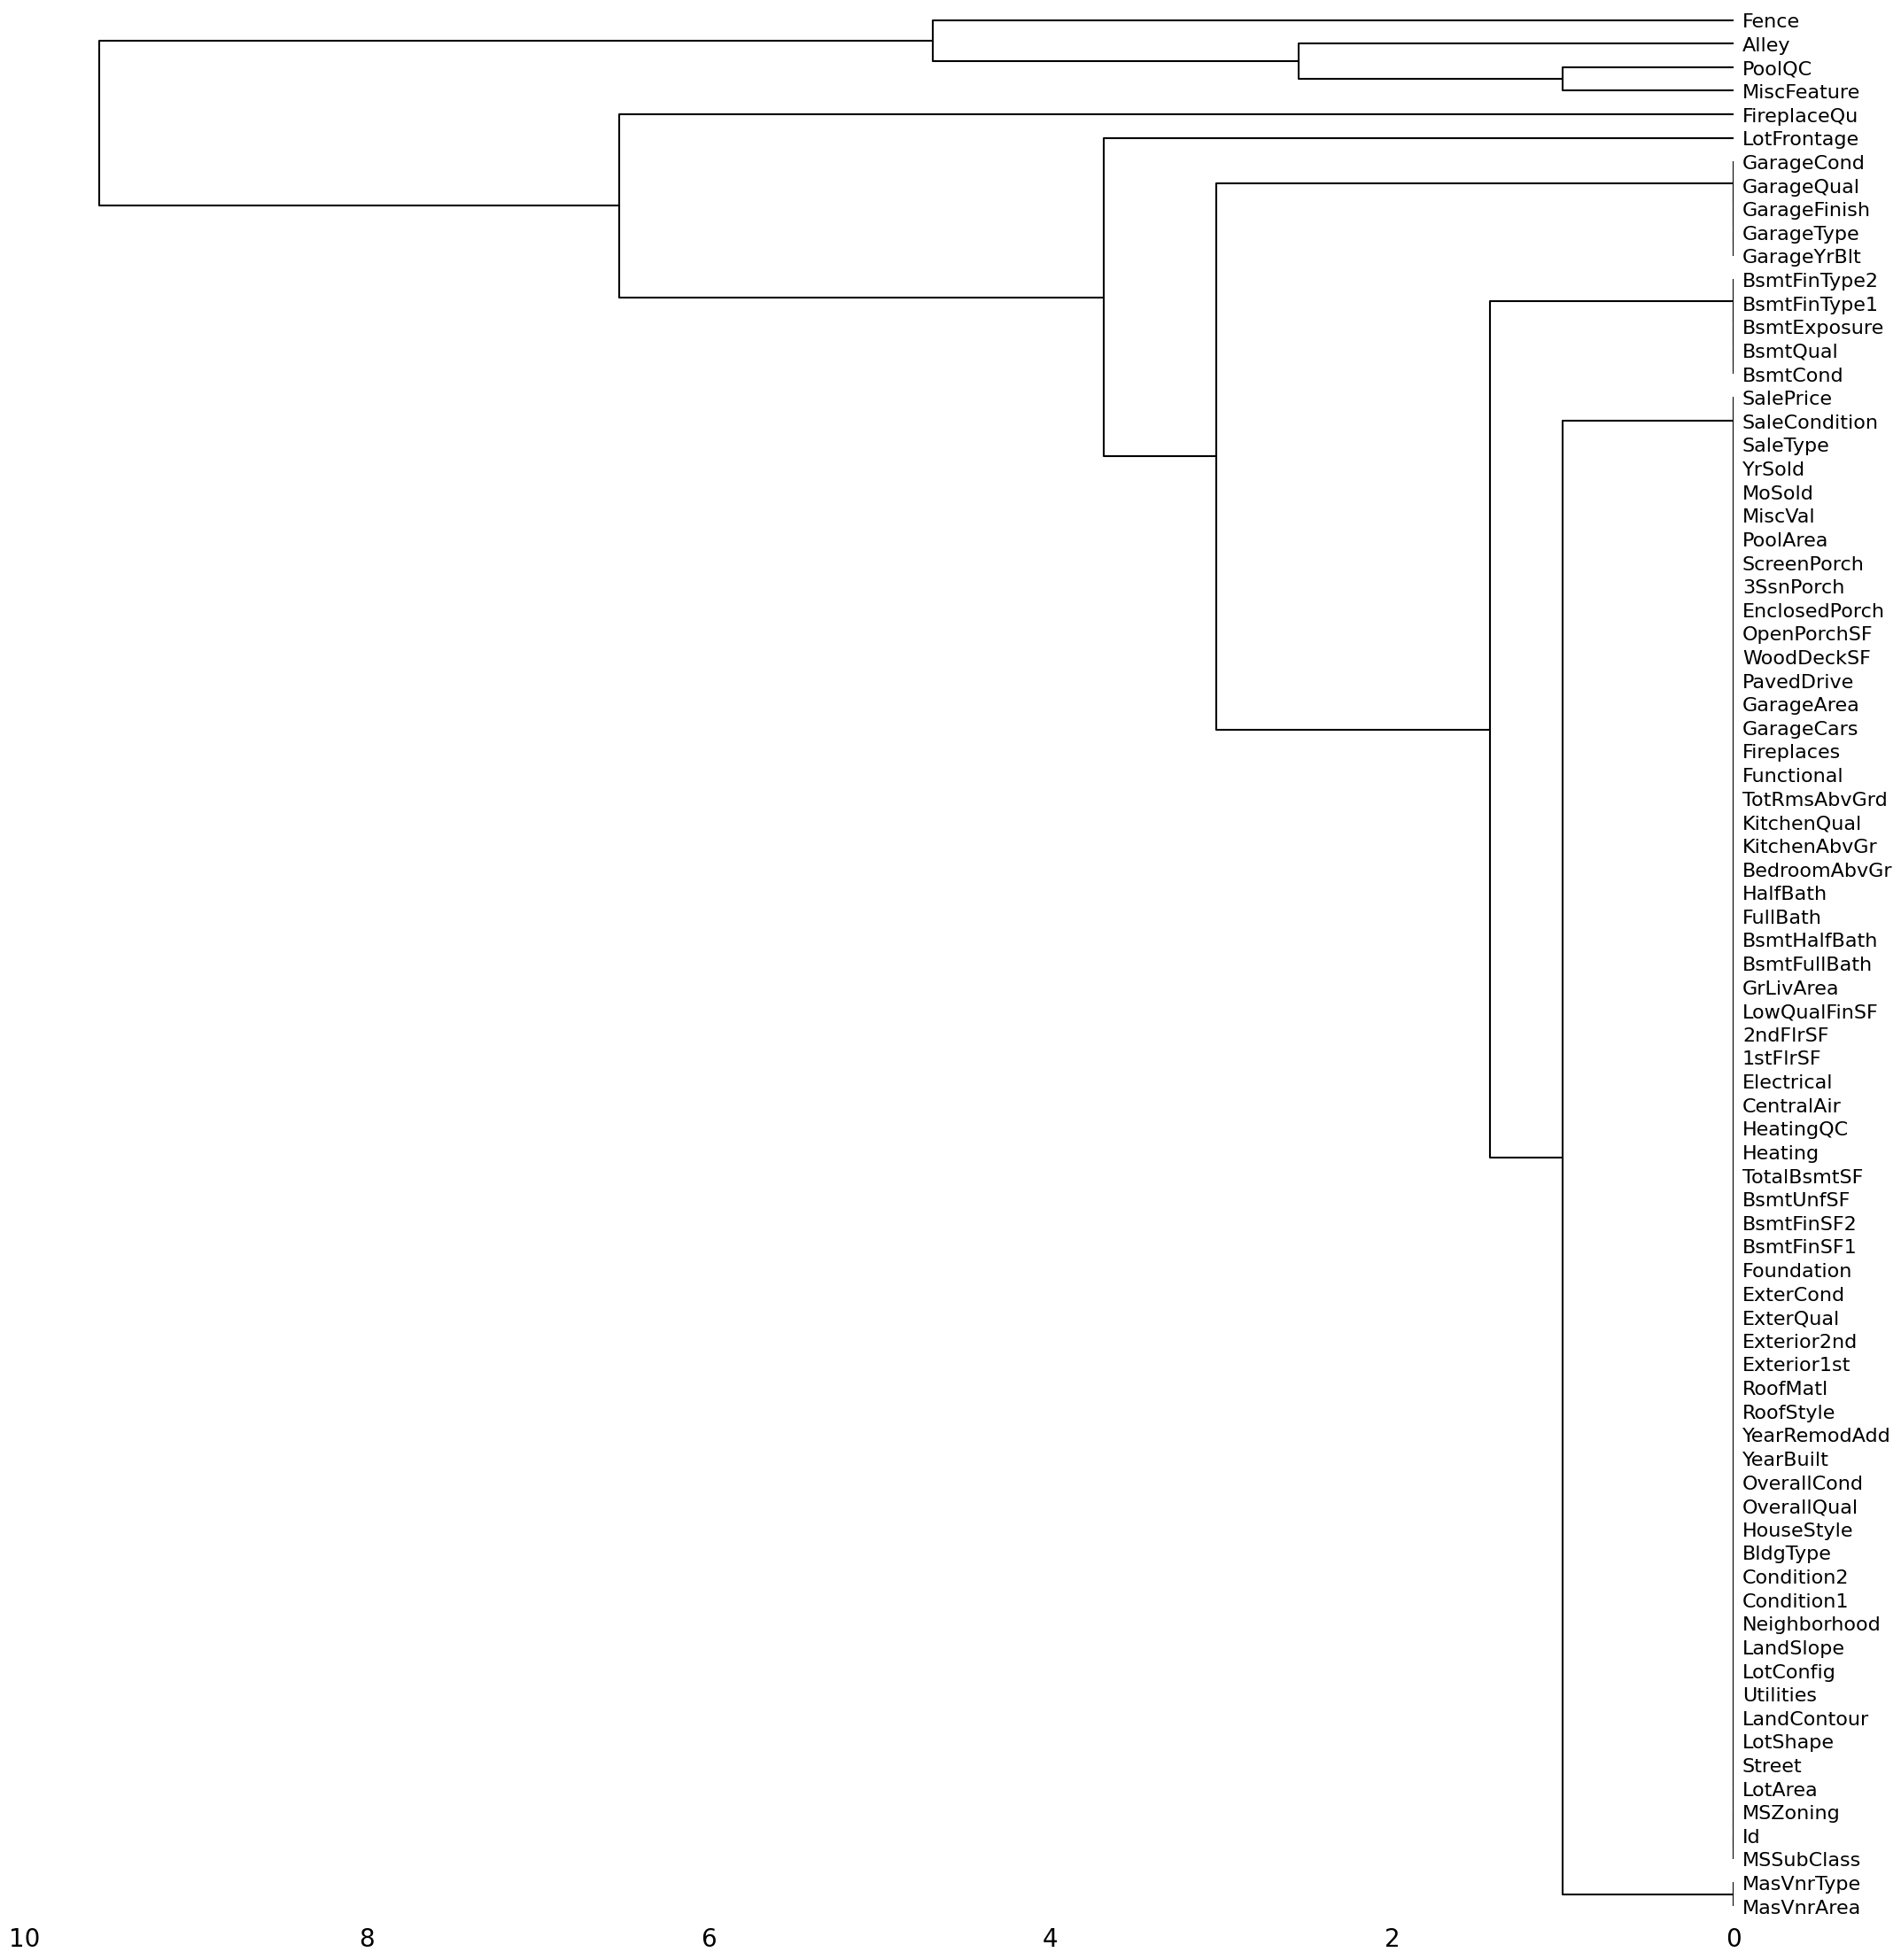

In [13]:
msno.dendrogram(train.sample(100))

O método `msno.heatmap()` ajuda a identificar ausencias correlacionadas. Isto ocorre quando um dado em um formulário é ausente porque o valor em outro campo torna o campo ausente não aplicável. Por exemplo, se em um formulário perguntar se o usuário possui automóvel e em outro campo perguntar a marca do veículo. A ausência em marca é correlacionada com a resposta anterior. 

No heatmap neste exemplo as ausências são independentes. Não há correlações (>.70) observadas. A diagnoal mostra o valor do atributo com ele mesmo, e deve ser ignorado neste contexto.

<AxesSubplot: >

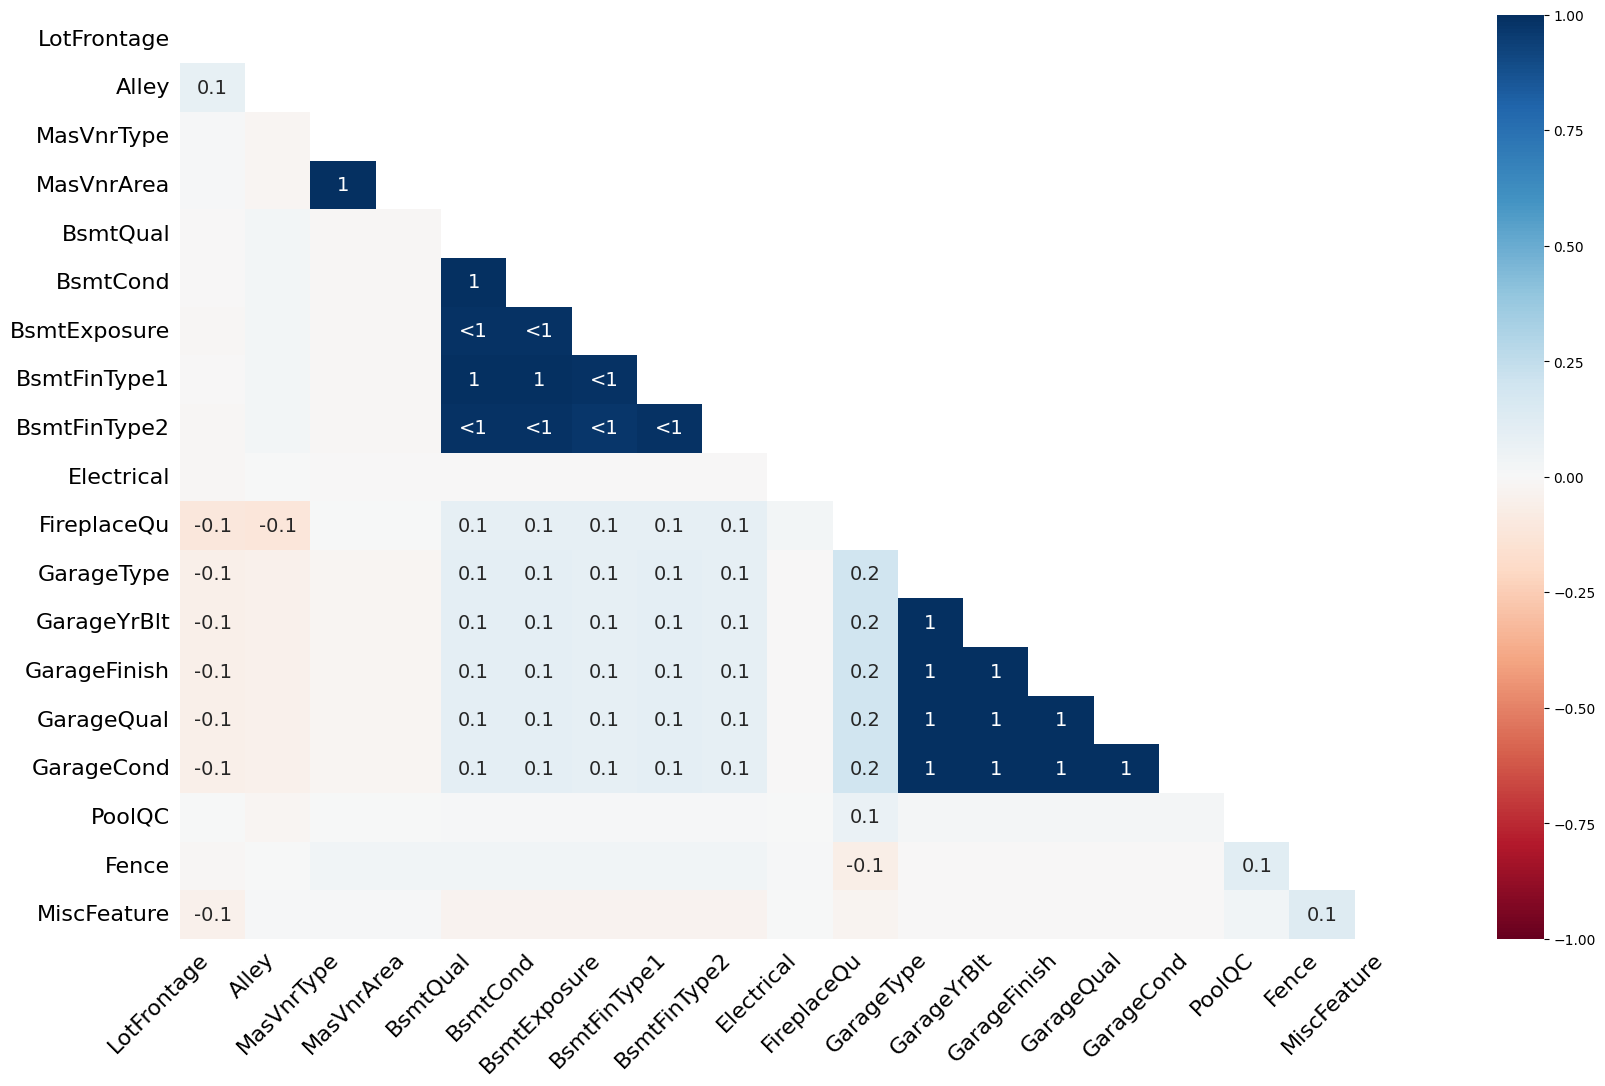

In [14]:
msno.heatmap(train)

**Comentários**
    
   Os atributos com maior taxa de dados ausentes são: PoolQC (0.99), MiscFeature (0.96), Alley (0.93), Fence (0.80) e FireplaceQu (0.47)

Por exemplo, o atributo PoolQC só possui 7 instancias. Portanto, é um candidato a remoção

**Recomendação**
 
   1. Considerar remover os atributos com maior porcentagem (>70), já que eles não estão presentes na maioria das tuplas.
   2. Imputar dados para os demais atributos: mediana para os numéricos e moda para os categóricos

A ausencia de dados pode ser observada com o método `msno.matrix()`. Assim, identificamos visualmente colunas ou linhas que possuam dados ausentes 

<AxesSubplot: >

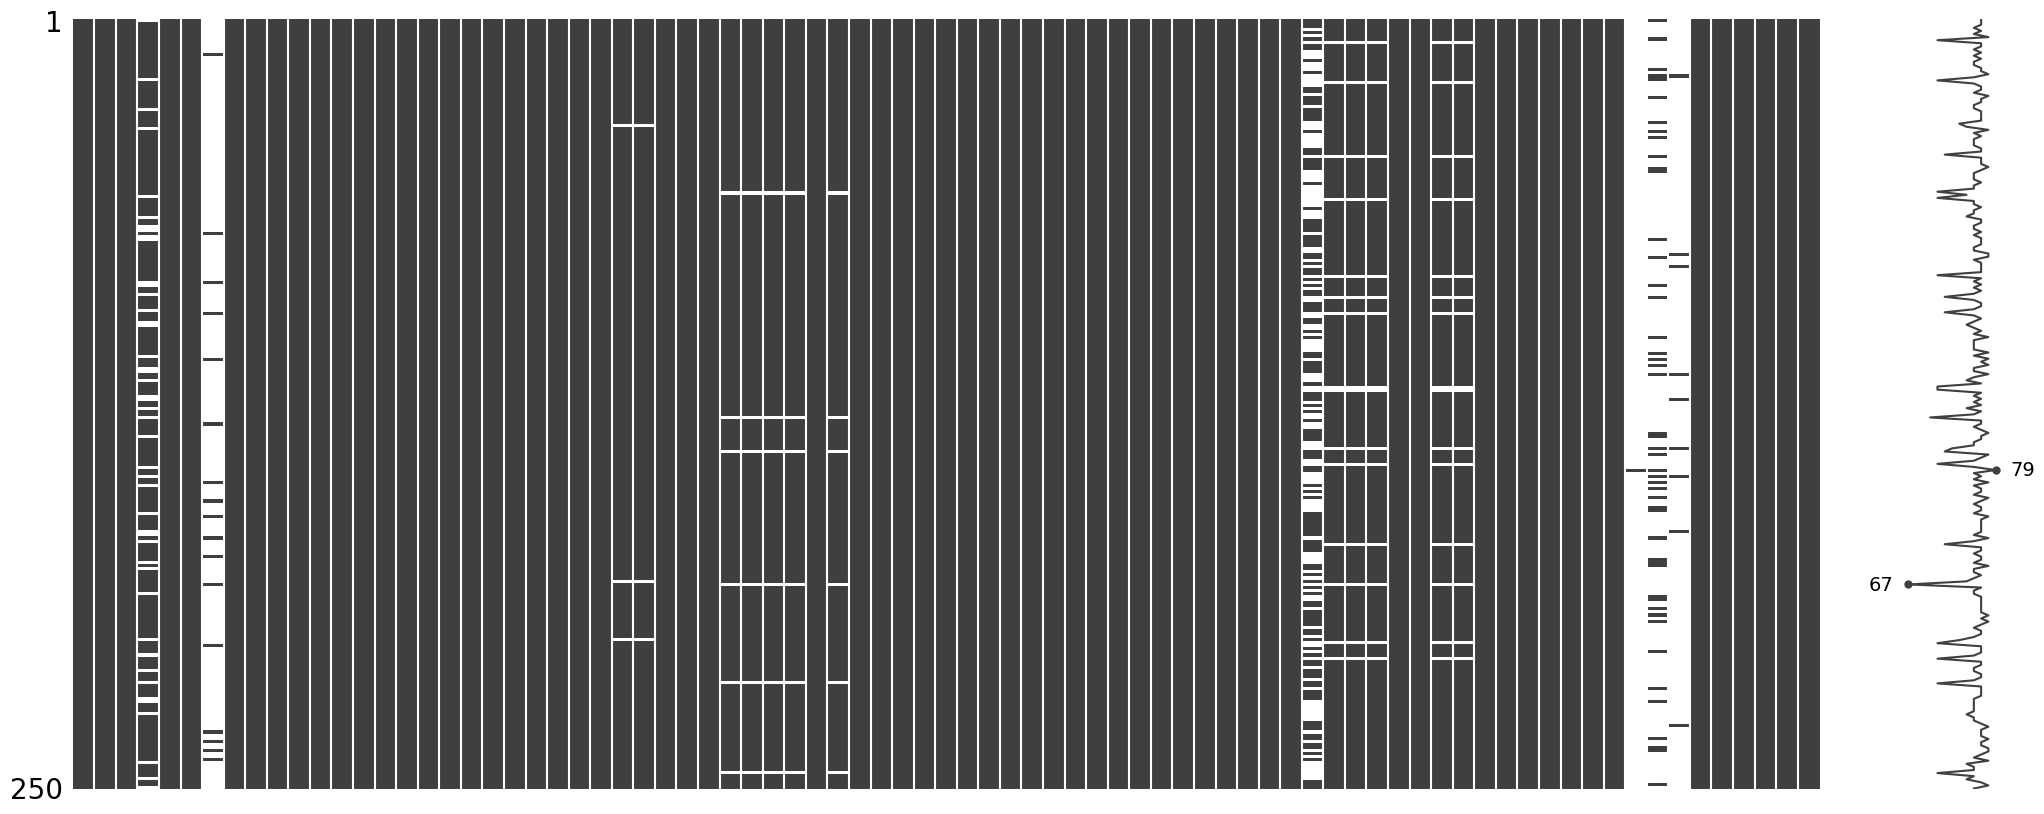

In [15]:
msno.matrix(train.sample(n=250))

**Comentários**

Apenas de haver várias colunas com porcentagem alta de ausencia de dados (já identificadas), todas as linhas apresentam entre 66 e 79 valores presentes. Portanto, não parece ser necessário eliminar linhas inteiras deste dataset. 

### 2.2 - Tratamento de dados ausentes

Remover colunas com mais que 70% de nulos

In [16]:
ausentes = train.isnull().sum()/len(train)

In [17]:
cols_remover = ausentes[ausentes > 0.7].index.to_list()

In [18]:
cols_remover

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
train_1 = train.drop(cols_remover,axis=1).copy()

<AxesSubplot: >

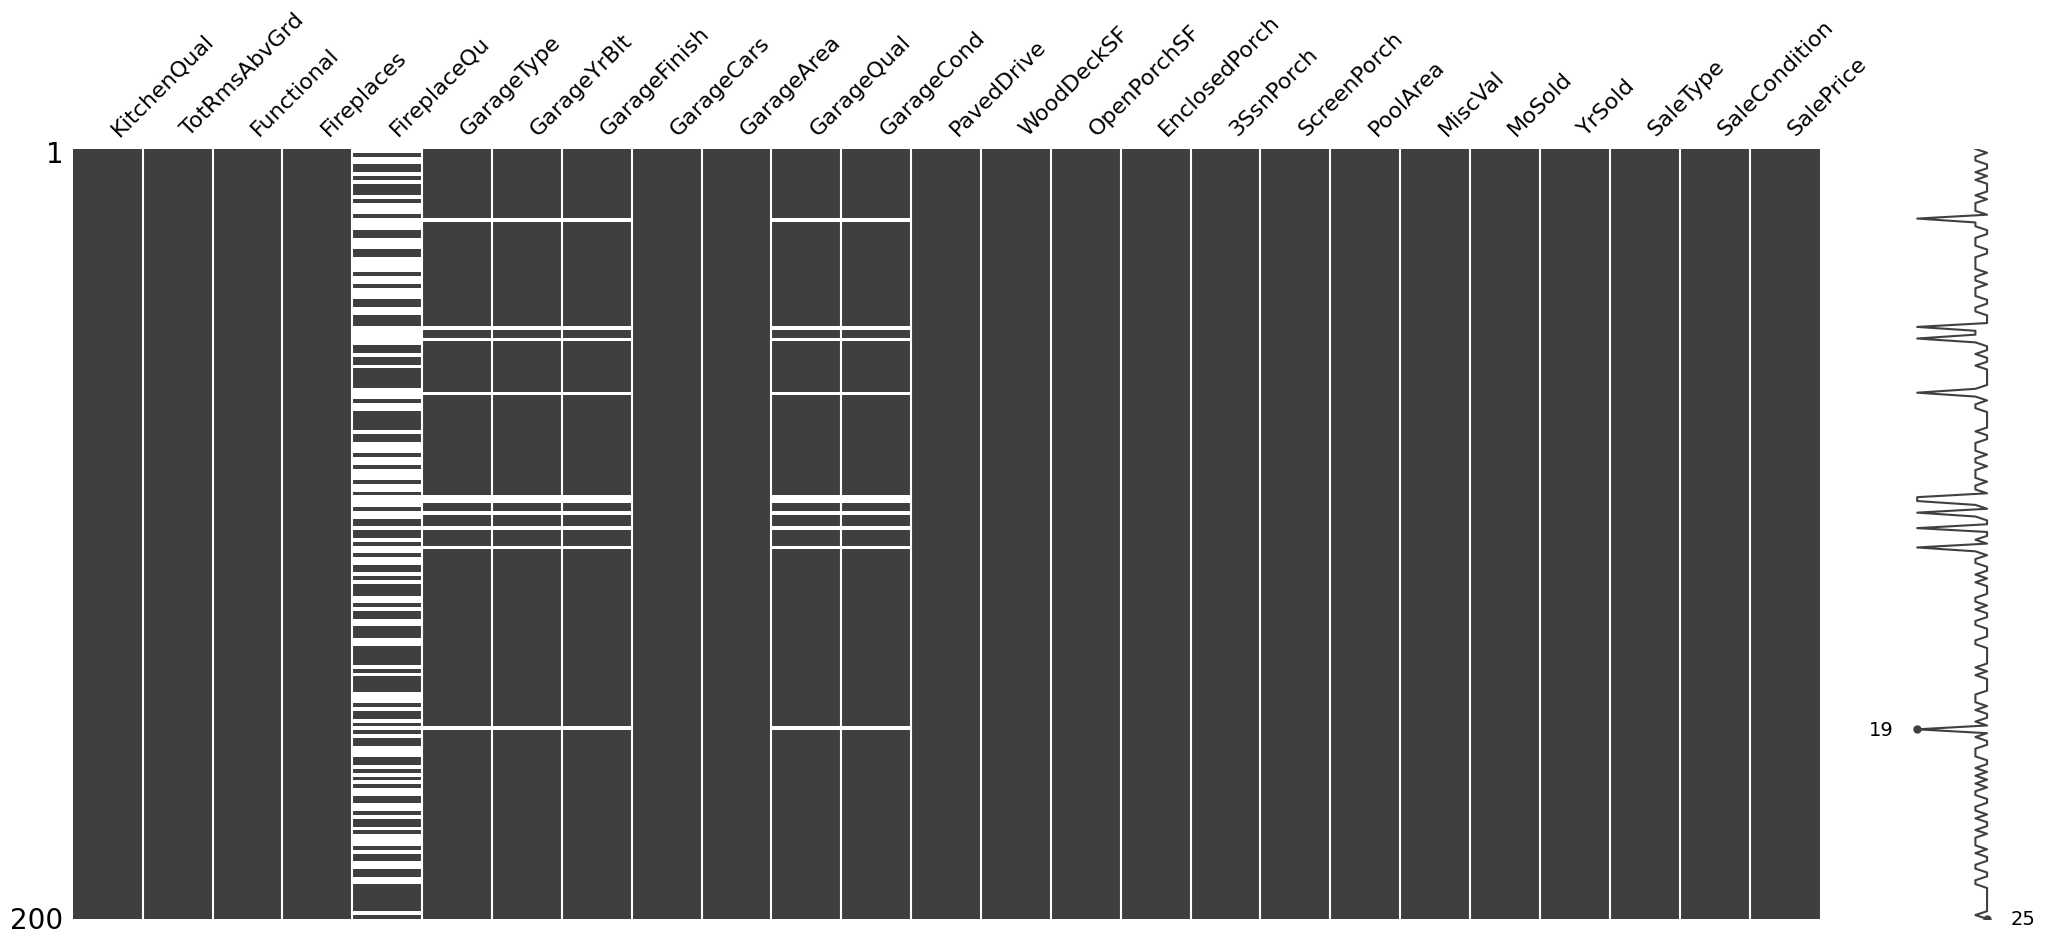

In [20]:
msno.matrix(train_1.iloc[:,-25:].sample(200))

Imputar dados para as colunas com poucos valores ausentes. Mediana para numéricos e moda para os categóricos

In [21]:
cols_imputar = ausentes[ (0.0 < ausentes) & (ausentes < 0.7)].index.to_list()

In [22]:
print(cols_imputar)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


Como temos muitas colunas para imputar, vamos definir uma função para facilitar esse processo

In [23]:
def imputar_mean_mode(s):
    if s.dtype.kind in 'biufc': # veja numpy dtype.kind
        return s.fillna(s.mean())
    else:
        return s.fillna(s.mode()[0])

In [24]:
train_2 = train_1.copy()

In [25]:
train_2[cols_imputar] = train_1[cols_imputar].apply(imputar_mean_mode)

Vamos verificar que não há mais valores nulos no dataframe resultante.

In [26]:
train_2.isnull().sum()/len(train_1)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 77, dtype: float64

<AxesSubplot: >

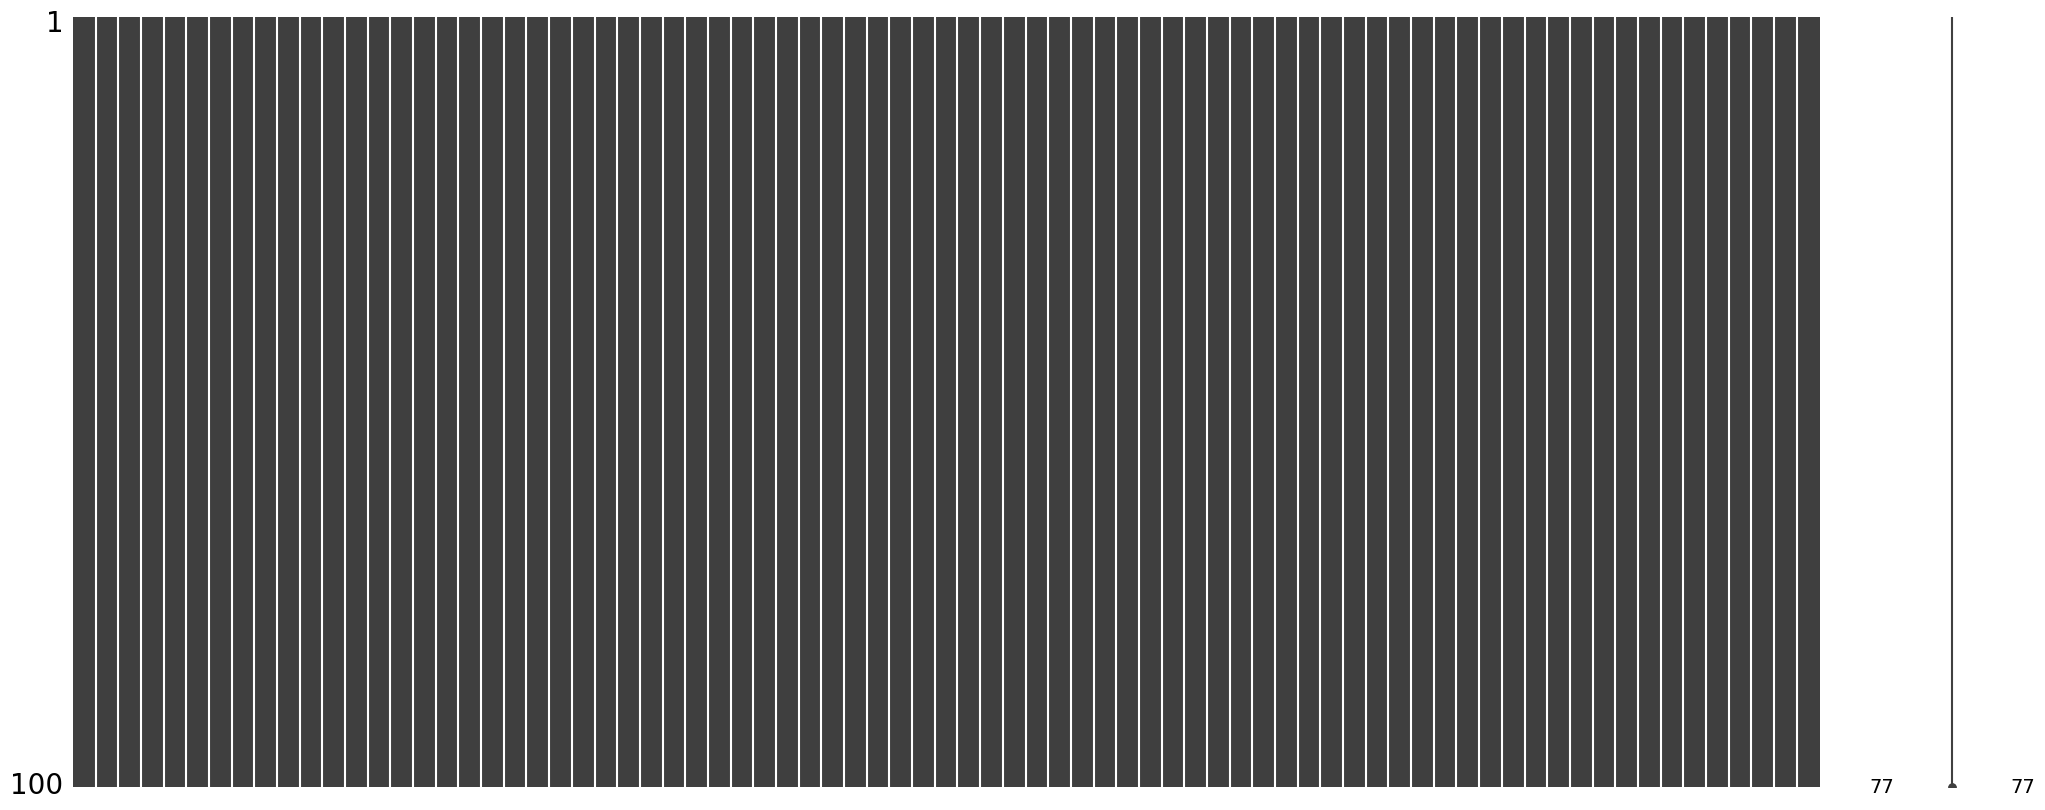

In [27]:
msno.matrix(train_2.sample(n=100))

Observe que há um aumento na quantidade de valores na média, mas não modificou a distribuição em geral. Ainda assim, é necessário averiguar a alternativa de remover as linhas ou colunas onde este valor é nulo

Text(0.5, 1.0, 'Depois')

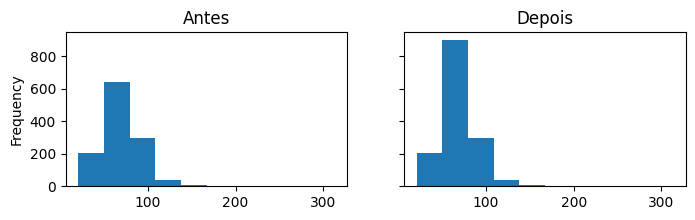

In [105]:
fig,axes = plt.subplots(ncols=2,figsize=(8,2),sharey=True)
train_1.LotFrontage.plot(kind='hist',ax=axes[0])
axes[0].set_title('Antes')
train_2.LotFrontage.plot(kind='hist',ax=axes[1])
axes[1].set_title('Depois')

Note que após a mudança o valor mais frequente (moda) é o mesmo. Entretanto, há muito mais casos deste valor, que antes eram nulos. É importante sempre verificar com um especialista no domínio se essa modificação faz sentido ou se é melhor eliminar a tupla ou coluna. 

Text(0.5, 1.0, 'Depois')

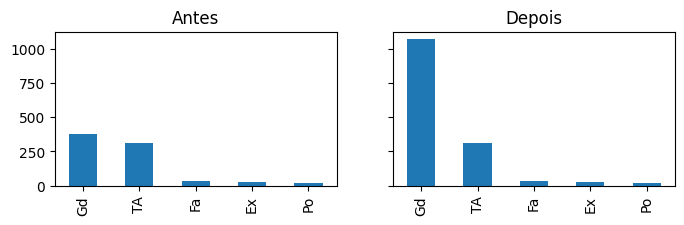

In [106]:
fig,axes = plt.subplots(ncols=2,figsize=(8,2),sharey=True)
train_1.FireplaceQu.value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('Antes')
train_2.FireplaceQu.value_counts().plot.bar(ax=axes[1])
axes[1].set_title('Depois')

Podemos realizar essa tarefa também com uma função lambda

In [107]:
temp = train_1[cols_imputar].apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))

Por fim, é possivel utilizar o `SimpleImputer` da bibliteca `sklearn`

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
freq_imputer = SimpleImputer(strategy='most_frequent')

In [110]:
temp = train_1[cols_imputar].copy()

Como o resultado é um ndarray, temos que atribuir os valores para uma fatia do dataframe

In [111]:
temp.iloc[:,:]=freq_imputer.fit_transform(train_1[cols_imputar])

## 3. Valores anômalos

### 3.1 Diagnóstico de valores anômalos

In [140]:
train_2.skew(numeric_only=True).sort_values(ascending=False)[:10]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
dtype: float64

In [141]:
train_2.skew(numeric_only=True).sort_values(ascending=False)[:-10:-1] 

GarageYrBlt    -0.668175
YearBuilt      -0.613461
YearRemodAdd   -0.503562
GarageCars     -0.342549
Id              0.000000
FullBath        0.036562
YrSold          0.096269
GarageArea      0.179981
BedroomAbvGr    0.211790
dtype: float64

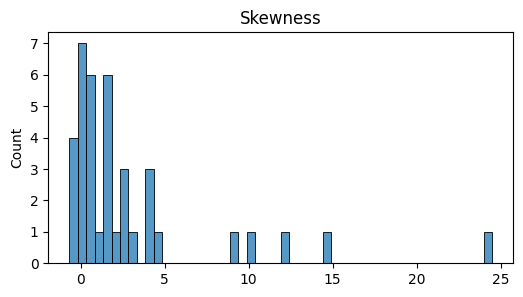

In [114]:
sns.histplot(train_2.skew(numeric_only=True),bins=50)
plt.title("Skewness")
plt.show()

In [115]:
train_2.kurt(numeric_only=True).sort_values(ascending=False)[:10]

MiscVal         701.003342
PoolArea        223.268499
LotArea         203.243271
3SsnPorch       123.662379
LowQualFinSF     83.234817
LotFrontage      21.848165
KitchenAbvGr     21.532404
BsmtFinSF2       20.113338
ScreenPorch      18.439068
BsmtHalfBath     16.396642
dtype: float64

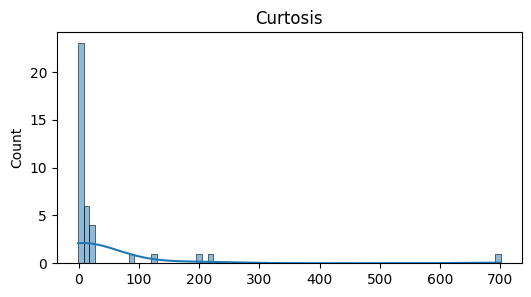

In [116]:
sns.histplot(train_2.kurt(numeric_only=True), kde = True)
plt.title("Curtosis")
plt.show()

**Comentário**: Há muitos atributos com distribução não normal, com caudas à esquerda e à direita. Também há algumas variáveis com curtosis muito alta (acima de 100), o que pode indicar forte presença de outliers. 

**Recomendação**: considerar tratamento de outliers para os atributos com maiores curtosis

Use o código abaixo para visualizar a distribuição de uma determinada colunas

Text(11935.0, 5608.433568012041, 'kurt = 701.00')

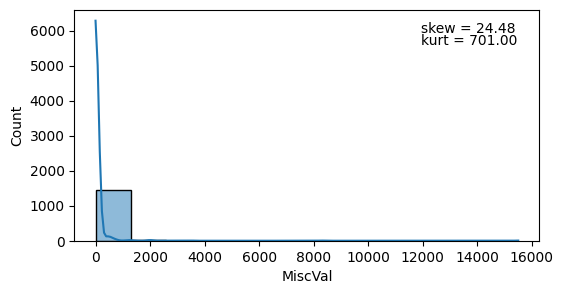

In [155]:
col = 'MiscVal'
skw = train_2[col].skew() 
krt = train_2[col].kurt()
max_x = train_2[col].max()
g = sns.histplot(train_2[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")

Vamos observar as ditribuições das variáveis com maior assimetria (skewness)

In [121]:
nf_cols_skew_asce = train_2.drop(columns=['Id']).\
                skew(numeric_only=True).\
                sort_values(ascending=True).index

nf_cols_skew_desc = train_2.drop(columns=['Id']).\
                skew(numeric_only=True).\
                sort_values(ascending=False).index

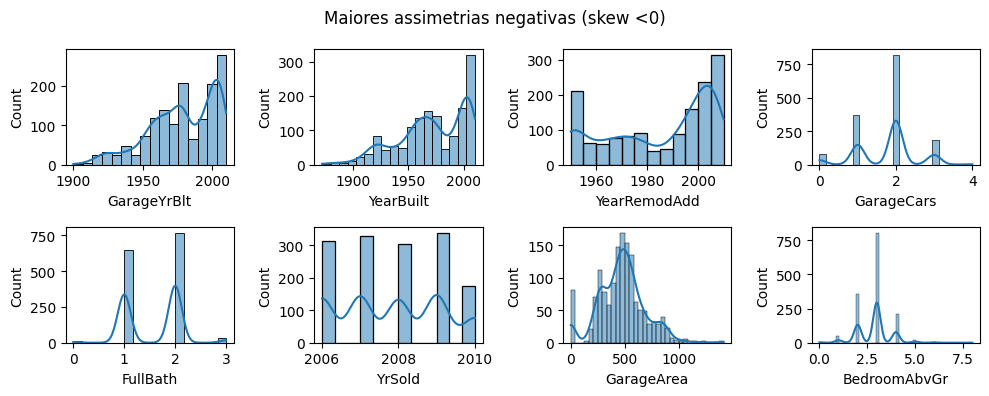

In [126]:
rows=2
cols=4
fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
axes = axes.flatten() # ou .ravel()
fig.suptitle("Maiores assimetrias negativas (skew <0)")
for i,col in enumerate(nf_cols_skew_asce[:rows*cols]):
    if (i<len(axes)):
        sns.histplot(data=train_2,x=col,ax=axes[i],kde=True)
plt.tight_layout()


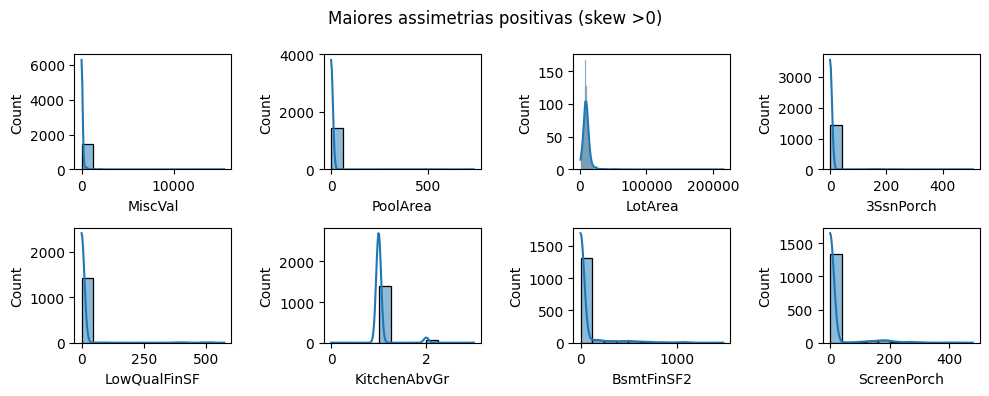

In [138]:
rows=2
cols=4
fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
axes = axes.flatten() # ou .ravel()
fig.suptitle("Maiores assimetrias positivas (skew >0)")
for i,col in enumerate(nf_cols_skew_desc[:rows*cols]):
    if (i<len(axes)):
        sns.histplot(data=train_2,x=col,ax=axes[i],kde=True)
plt.tight_layout()

**Comentários**

Os atributos com maiores assimetrias e curtosis podem precisar de transformação ou tratamento de outliers. Por exemplo:

 - skew > 0: MiscVal, PoolArea, LotArea, 3SsnPorch 
 - skew < 0: GarageYrBlt, YearBuilt, YearRemodAdd, GarageCars

### 3.2 - Tratamento de valores anômalos

In [129]:
from scipy import stats
def drop_outliers_z(df,col,k=3):
  z_values = np.abs(stats.zscore(df[col]))
  return df[z_values < k]

Vamos utilizar a assimetria para eliminar os valores anomalos

In [130]:
cols_skew = train_2.drop(columns=['Id']).\
                skew(numeric_only=True).\
                sort_values(ascending=True)

Vamos tratar apenas casos de assimetria maior que 5. Esse valor é arbitrário, para este dataset apenas. Ele representa um ponto de corte que não afeta muito a quantidade de tuplas no dataset apos a limpeza. O valor foi escolhido depois de efetuados vários testes com valores diferentes.

In [131]:
cols_skew_gt_7 = cols_skew[cols_skew>5].index.to_list()

In [132]:
cols_skew_gt_7

['LowQualFinSF', '3SsnPorch', 'LotArea', 'PoolArea', 'MiscVal']

In [133]:
train_3 = train_2.copy()
for c in  cols_skew_gt_7:
    train_3 = drop_outliers_z(train_3,c,k=2)  

In [134]:
train_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Algumas colunas foram mais modificadas, enquanto alguma não perderam tantas linhas. Veja MiscVal ou BedroomAbvGr onde se pode notar que perderam os outliers

In [135]:
nf_cols_skew_asce_limpo = train_3.drop(columns=['Id']).\
                skew(numeric_only=True).\
                sort_values(ascending=True).index

nf_cols_skew_desc_limpo = train_3.drop(columns=['Id']).\
                skew(numeric_only=True).\
                sort_values(ascending=False).index

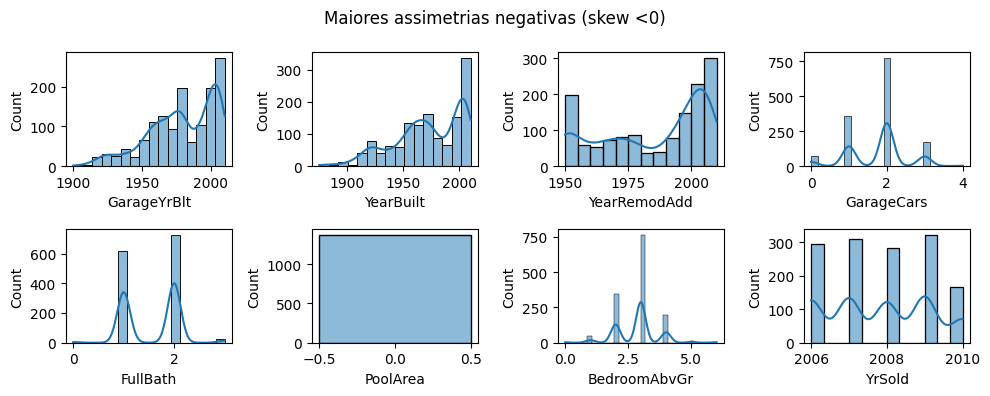

In [139]:
rows=2
cols=4
fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
axes = axes.flatten() # ou .ravel()
fig.suptitle("Maiores assimetrias negativas (skew <0)")
for i,col in enumerate(nf_cols_skew_asce_limpo[:rows*cols]):
    if (i<len(axes)):
        sns.histplot(data=train_3,x=col,ax=axes[i],kde=True)
plt.tight_layout()


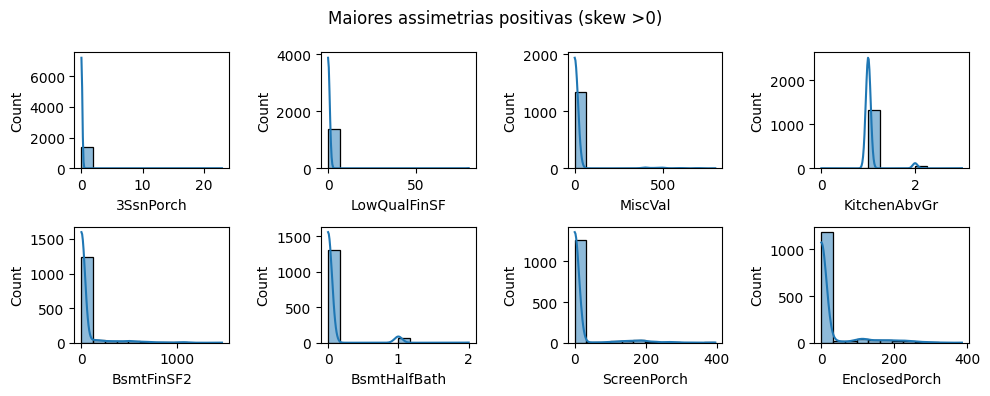

In [136]:
rows=2
cols=4
fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
axes = axes.flatten() # ou .ravel()
fig.suptitle("Maiores assimetrias positivas (skew >0)")
for i,col in enumerate(nf_cols_skew_desc_limpo[:rows*cols]):
    if (i<len(axes)):
        sns.histplot(data=train_3,x=col,ax=axes[i],kde=True)
plt.tight_layout()

Outra alternativa seria utilizar discretização de valores. Por exemplo, em PoolArea, poderiamos criar uma codificação para indicar 3 tipos de áreas: zero (sem piscina, até 500, acima de 500).

O caso específico de PoolArea, mostra que apenas 7 tuplas contém informação diferente de zero. Embora não tenha sido capturado como um valor nulo, na prática esse atributo não possui variedade de valores e na prática pode ser descartado. 

Nesta etapa, o analista deve decidir qual a melhor estratégia para cada coluna: 
 1. remoção da coluna, 
 1. remoção de outliers 
 1. discretização

# 4. Re-escala de dados

### 4.1 - Re-escala de colunas numéricas

In [156]:
train_3.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,...,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.0,1377.000000,1377.000000,1377.000000,1377.000000
mean,733.018155,56.877269,69.383362,9574.976761,6.092229,5.559187,1972.109659,1984.981845,102.714449,429.524328,...,91.932462,45.684822,21.774873,0.016703,14.201162,0.0,12.014524,6.315178,2007.818446,178941.347131
std,420.259939,42.199022,20.633710,3823.531963,1.376000,1.095520,29.920345,20.648226,176.807873,427.679130,...,120.732992,63.836360,59.968040,0.619813,52.149852,0.0,78.296951,2.694904,1.329619,76291.197288
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,34900.000000
25%,372.000000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000,129500.000000
50%,735.000000,50.000000,70.049958,9375.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,375.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,161000.000000
75%,1094.000000,70.000000,78.000000,11362.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,700.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,212000.000000
max,1460.000000,190.000000,313.000000,29959.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,736.000000,523.000000,386.000000,23.000000,396.000000,0.0,800.000000,12.000000,2010.000000,755000.000000


Aqui o analista deve decidir quais colunas devever ser re-escalonada. O cuidado deve ser para não escalonar uma coluna que apesar de numérica, tem informação de data, ou algo que deve ser preservado. 

In [170]:
def standard_scaling(x):
    return (x - x.mean()) / x.std()

def standard_scaling_df_columns(df, cols):
    for col in cols:
      df[col+"_scal"] = standard_scaling(df[col])
    return df

Como exemplo, vamos usar re-escala standard (z-score) para três colunas apenas. As demais deve ser analizadas caso a caso. 

In [171]:
cols_z = ["MSSubClass","LotFrontage","LotArea"]

In [172]:
train_4 = standard_scaling_df_columns(train_3.copy(),cols_z)

Compare as distribuições antes (train_3) e depois (train_4) abaixo

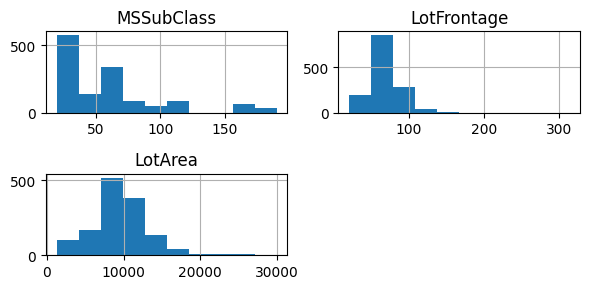

In [183]:
train_3.iloc[:,1:5].hist()
plt.tight_layout()

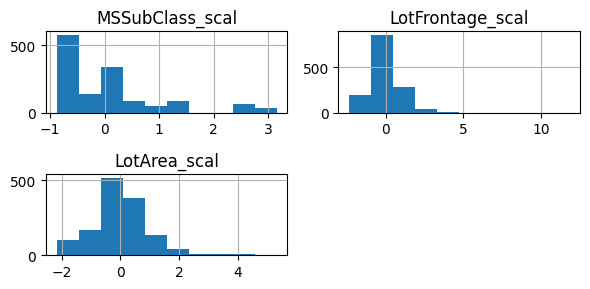

In [184]:
train_4.iloc[:,-3:].hist()
plt.tight_layout()

Uma alternativa mais sofisticada seria utilizar o `StandardScaler` do `sklearn`

### 4.2 - Codificação de dados categóricos

In [186]:
train_4.describe(exclude='number')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377,...,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377
unique,5,2,4,4,2,5,3,25,9,7,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1084,1373,885,1256,1376,1001,1316,213,1196,1366,...,690,1290,1017,897,649,1315,1327,1268,1191,1129


Neigborhood tem 25 valores unicos e pode ser um bom candidato a codificação ordinal. MSZoning pode ser ter uma codificação OneHot já que possui poucos valores. 

A codificação é dependente da tarefa. Por exemplo, regressão pode exigir uma codificação OneHot, já uma árvore pode não precisa. Deste modo, é prudente deixar a codificação para um momento posterior

Aqui vamos codificar para exemplificar, mas não vamos criar um novo dataset

In [188]:
codes =  train_4['Neighborhood'].astype('category').cat.codes
train_4['Neighborhood_code'] = codes

<AxesSubplot: >

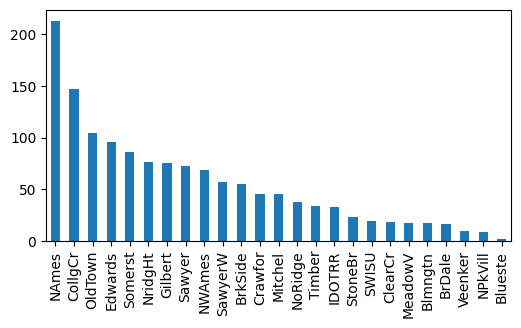

In [198]:
train_4['Neighborhood'].value_counts().plot(kind='bar')

<AxesSubplot: >

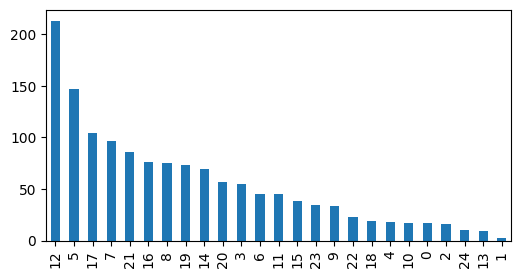

In [199]:
train_4['Neighborhood_code'].value_counts().plot(kind='bar')

In [200]:
train_4[['Neighborhood','Neighborhood_code']]

,Neighborhood,Neighborhood_code
0,CollgCr,5
1,Veenker,24
2,CollgCr,5
3,Crawfor,6
4,NoRidge,15
...,...,...
1454,Somerst,21
1455,Gilbert,8
1456,NWAmes,14
1458,NAmes,12


# 5. Conclusão

Neste exemplo, aplicamos várias técnicas de limpeza e transformação de dados para garantir a qualidade de um dataset. A próxima etapa é análise exploratória de dados.

Neste ponto, pode ser interessante salvar o trabalho. Para tanto há várias maneiras:
- Escrever o processo em forma de um módulo python com funções. Para utilizar depois basta importar o módulo
- Salvar o processo em forma de pipeline e serializar. Para utilizar, bastar carregar o arquivo serializado
- Salvar o dataset limpo resultante. 

A melhor abordagem é dependente do contexto. Salvar o dataset é a opção mais simples. As outras opções exigem mais atenção quanto às versões de bibliotecas utilizadas. 



https://nycdatascience.com/blog/student-works/analyzing-the-ames-housing-data-set-the-different-features/

In [206]:
train_4.to_csv('train_limpo.csv',index=False)

Veja no diretório de seu notebook o novo arquivo e abra em um editor de texto, excel ou mesmo o python

Use este código para treinar e bons estudos!

**Prof. Josenildo**